# Importing Libraries

In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 
import string

#NLTK libraries
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

# Data Preprocessing

In [2]:
df=pd.read_csv('Musical_instruments_reviews.csv')

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
df.shape

(10261, 9)

In [5]:
df.rename(columns = {'asin':'productID'}, inplace = True)

In [6]:
df.sample(10)

,reviewerID,productID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
3032,AYQCAPXJ81XTN,B0002IHFVM,paul day,"[0, 0]",this is a good product. its not the best strap...,5.0,planet waves guitar strap,1270512000,"04 6, 2010"
2713,AYJJDQQ4EZ5V3,B0002GZBNS,REM,"[0, 0]",This strap is not only nice looking and an exc...,5.0,Excellent,1380412800,"09 29, 2013"
4186,A2RVY2GDMZHH4,B000ARH3M6,puddytat,"[0, 0]",A real workhorse for sure. Not too heavy but ...,5.0,Use it every week,1356652800,"12 28, 2012"
2664,A3NMQFWLXPP8EV,B0002GYW4C,"Tabasco24 ""The Cheese""","[0, 0]",I feel like this picks dirt off my guitar stri...,5.0,Good microfiber material- gentle on the guitar...,1401408000,"05 30, 2014"
7938,A2X3UAK5HLALMJ,B003GEBGA0,"Guitarist, Bassist, Gamer","[0, 0]",I would recommend this mic for any application...,5.0,Good deal and 95% similar to the real deal,1385942400,"12 2, 2013"
998,A2C46HQIZLYJUC,B0002D0CQC,tj,"[16, 21]",I used this on a 5string bass. I liked how thi...,3.0,"Good product idea, could causes problems for s...",1329782400,"02 21, 2012"
9229,A1NJMJNF0MOBSL,B005IGFGWI,Garyb,"[0, 0]","Have used them for years, bought some new guit...",5.0,They work great,1371513600,"06 18, 2013"
2464,A1Q3YZOVFXRKDZ,B0002GTZR6,slambusky,"[0, 0]",as I said on my last Dunlop strap reviewI love...,5.0,another great strap,1344124800,"08 5, 2012"
7330,A35HTG0YUEKFGM,B002HPMTZU,Tony Wall,"[0, 0]",I saw this tuner in the local music store for ...,5.0,AWESOME TUNER,1391731200,"02 7, 2014"
9094,AXP9CF1UTFRSU,B005CX4GLE,tada,"[0, 0]",Wanted to hang my guitars on the wall. These ...,5.0,I bought 3,1397606400,"04 16, 2014"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   productID       10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
reviewerID,10261,1429,ADH0O8UVJOT10,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productID,10261,900,B003VWJ2K8,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewerName,10234,1397,Amazon Customer,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpful,10261,269,"[0, 0]",6796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewText,10254,10254,I typically use dimarzio cliplocks on all my b...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,10261,NaN,NaN,NaN,4.48874,0.894642,1,4,5,5,5
summary,10261,8852,Great,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unixReviewTime,10261,NaN,NaN,NaN,1.36061e+09,3.77974e+07,1.09547e+09,1.34343e+09,1.36849e+09,1.38897e+09,1.40599e+09
reviewTime,10261,1570,"01 22, 2013",40,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Checking for duplicates

df.duplicated().sum()

0

In [10]:
#Checking for null values

df.isnull().sum()

reviewerID         0
productID          0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

reviewerID        0
productID         0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [13]:
df.shape

(10227, 9)

In [14]:
df['reviews']=df['reviewText']+df['summary']
df=df.drop(['reviewText', 'summary'], axis=1)
df.head()

,reviewerID,productID,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


# Creating Target Variable

In [15]:
df['overall'].value_counts()

5.0    6912
4.0    2079
3.0     771
2.0     249
1.0     216
Name: overall, dtype: int64

In [16]:
def f(row):
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [17]:
df['sentiment'] = df.apply(f, axis=1)
df.head()

,reviewerID,productID,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [18]:
df['sentiment'].value_counts()

Positive    8991
Neutral      771
Negative     465
Name: sentiment, dtype: int64

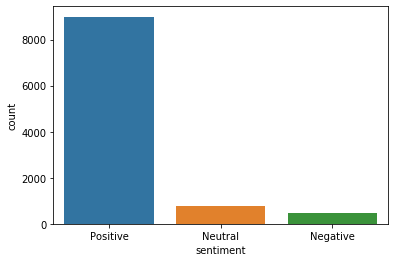

In [19]:
sns.countplot(x ='sentiment', data = df)

In [20]:
df=df.drop(['reviewerName','unixReviewTime','reviewTime'], axis=1)

In [21]:
df.head()

,reviewerID,productID,helpful,overall,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,"Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,This pop filter is great. It looks and perform...,Positive


In [22]:

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [23]:
def review_cleaning(text):

    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)


    return text

In [24]:
df['reviews']=df['reviews'].apply(review_cleaning)
df['reviews'].sample(10)

9929     for the price of 1  one saddle at gcyou get 2 ...
5905     this is my second black suede leather strap iv...
10112    this stand is sturdy and my guitars 34seat34 l...
1277     i have had other string winders but this had t...
4930     this pedal works well in my rig i have two bos...
5994     i like it got it fast and it is just the right...
3132     you get more than enough screws to install a f...
9638     i suppose it does what it is suppose to do it ...
1192     easy to pack easy on the instrument light weig...
3226     i bought 5 of these for live recording of my b...
Name: reviews, dtype: object

In [25]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', 'dont', 
             'very', 'should', 'any', 'y', 'isnt', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all','ive']

In [26]:
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['reviews'].head()

0    not much write but exactly supposed filters po...
1    product exactly quite affordablei not realized...
2    primary job device block breath would otherwis...
3    nice windscreen protects mxl mic prevents pops...
4    pop filter great looks performs like studio fi...
Name: reviews, dtype: object

In [27]:
df['polarity'] = df['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df['sub'] = df['reviews'].map(lambda text: TextBlob(text).sentiment.subjectivity)
df['review_len'] = df['reviews'].astype(str).apply(len)
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split()))

In [28]:
df.head()

,reviewerID,productID,helpful,overall,reviews,sentiment,polarity,sub,review_len,word_count
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,not much write but exactly supposed filters po...,Positive,0.250000,0.441667,162,25
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,product exactly quite affordablei not realized...,Positive,0.014286,0.292857,356,55
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,primary job device block breath would otherwis...,Positive,0.167500,0.434286,315,48
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,nice windscreen protects mxl mic prevents pops...,Positive,0.333333,0.875000,169,22
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,pop filter great looks performs like studio fi...,Positive,0.800000,0.750000,136,21


# Encoding The Data

In [29]:
df['sentiment'].head(20)

0     Positive
1     Positive
2     Positive
3     Positive
4     Positive
5     Positive
6     Positive
7      Neutral
8     Positive
9     Positive
10    Positive
11    Positive
12     Neutral
13    Positive
14    Positive
15    Negative
16    Positive
17    Positive
18    Positive
19    Positive
Name: sentiment, dtype: object

In [30]:
label_encoder = preprocessing.LabelEncoder() 
  
df['sentiment']= label_encoder.fit_transform(df['sentiment']) 
  

In [31]:
df['sentiment'].head(20)

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     1
8     2
9     2
10    2
11    2
12    1
13    2
14    2
15    0
16    2
17    2
18    2
19    2
Name: sentiment, dtype: int32

In [32]:
y=df['sentiment']

In [33]:
print(y)

0        2
1        2
2        2
3        2
4        2
        ..
10256    2
10257    2
10258    2
10259    2
10260    2
Name: sentiment, Length: 10227, dtype: int32


In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
x= tfidf_vectorizer.fit_transform(df['reviews'])

In [35]:
print(x)

  (0, 2548)	0.5611188514987472
  (0, 3316)	0.5302662900481007
  (0, 1127)	0.5254486145900726
  (0, 2870)	0.3575850242344104
  (1, 2185)	0.34239763033890636
  (1, 1088)	0.34239763033890636
  (1, 1152)	0.3062944616774691
  (1, 4686)	0.3379082427871519
  (1, 4847)	0.21026077358758952
  (1, 4803)	0.24773507777207926
  (1, 3315)	0.5150012705240472
  (1, 4542)	0.3379082427871519
  (1, 1086)	0.2693304602631098
  (2, 2033)	0.38722037410781074
  (2, 3964)	0.4303409922301611
  (2, 1516)	0.484199153463491
  (2, 1066)	0.4495298369109913
  (2, 2774)	0.47785051825250124
  (4, 3596)	0.5892411374829664
  (4, 1959)	0.33505225069144146
  (4, 1572)	0.5821593519112269
  (4, 3315)	0.44902712633723996
  (5, 3992)	0.38512201807563406
  (5, 519)	0.33532071736596597
  (5, 2089)	0.4379684155004857
  :	:
  (10225, 247)	0.1955589234417611
  (10225, 588)	0.14565273981061447
  (10225, 3847)	0.1270228438290012
  (10225, 3673)	0.1569826837360378
  (10225, 463)	0.17992263400997202
  (10225, 462)	0.16224497805838692
  

In [36]:
y=df['sentiment']

In [37]:
print(y)

0        2
1        2
2        2
3        2
4        2
        ..
10256    2
10257    2
10258    2
10259    2
10260    2
Name: sentiment, Length: 10227, dtype: int32


In [38]:
y.value_counts()

2    8991
1     771
0     465
Name: sentiment, dtype: int64

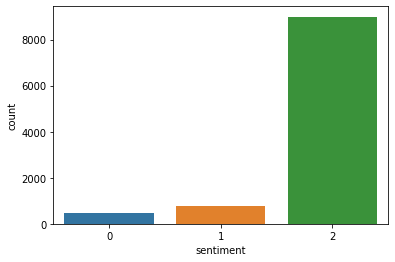

In [39]:
sns.countplot(x ='sentiment', data = df)

In [40]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x, y)

print(f'Resampled dataset shape {Counter(y_res)}')


Original dataset shape : Counter({2: 8991, 1: 771, 0: 465})
Resampled dataset shape Counter({2: 8991, 1: 8991, 0: 8991})


In [41]:
X_res

<26973x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 260341 stored elements in Compressed Sparse Row format>

In [42]:
y_res.shape

(26973,)

In [43]:
y_res

0        2
1        2
2        2
3        2
4        2
        ..
26968    1
26969    1
26970    1
26971    1
26972    1
Name: sentiment, Length: 26973, dtype: int32

# Model Building


In [44]:
## Divide the dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [45]:
y_train.shape,y_test.shape

((20229,), (6744,))

In [46]:
y_test

18328    0
20851    1
21312    1
17707    0
439      2
        ..
2813     2
13105    0
679      2
26805    1
5317     1
Name: sentiment, Length: 6744, dtype: int32

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [48]:
logreg = LogisticRegression(random_state=0)


In [49]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


Confusion matrix, without normalization


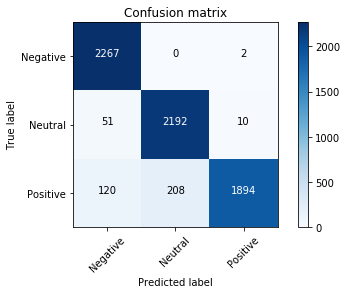

In [50]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [51]:
metrics.confusion_matrix(y_test, y_pred)

array([[2267,    0,    2],
       [  51, 2192,   10],
       [ 120,  208, 1894]], dtype=int64)

In [52]:
y_test.value_counts()

0    2269
1    2253
2    2222
Name: sentiment, dtype: int64

In [53]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2269
           1       0.91      0.97      0.94      2253
           2       0.99      0.85      0.92      2222

    accuracy                           0.94      6744
   macro avg       0.95      0.94      0.94      6744
weighted avg       0.95      0.94      0.94      6744



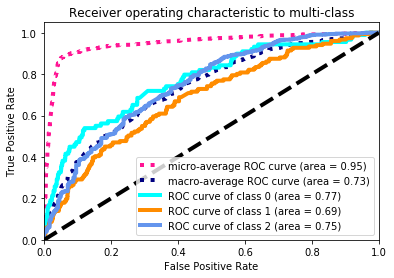

In [58]:
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Test Cases



In [62]:
print(y_test)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 1 0]
 [0 0 1]]


In [63]:
pred=logreg.predict(x_test[635])  #Predicted Value = Neutral
print(pred)                     

[1]


In [64]:
actual=y_test[635]   #Actual Value = Neutral
print(actual)

[0 1 0]


In [65]:
print(logreg.predict(x_test[3])) #Predicted Value = Negative

[0]


In [66]:
print(y_test[3])  #Actual Value = Negative

[1 0 0]


In [67]:
print(logreg.predict(x_test[5])) #Predicted Value = Negative

[0]


In [68]:
print(y_test[5])  #Actual Value = Negative

[1 0 0]


In [69]:
print(logreg.predict(x_test[38])) #Predicted Value = Positive

[2]


In [70]:
print(y_test[38]) #Actual Value = Positive

[0 0 1]


In [71]:
print(logreg.predict(x_test[2044])) #Predicted Value = Neutral

[1]


In [72]:
print(y_test[2044])  #Actual Value = Neutral

[0 1 0]
